In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm # color map
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

---
### *Mean Squared Error, MSE: a cost function for regression problems*
---
##### *The MSE is more useful as a cost function than the RSS.*
##### *The RSS keeps the residual sum for every data point in the dataset, as the dataset grows the overall sum can get pretty big causing an overflow error. The MSE instead, divides that sum by the number of samples keeping an average/mean, with this the cost function is always manageably small.*

#### $rss = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)}  \big)^2$ 
#### $mse = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)}  \big)^2$
#####                     *or*
#### $mse =  \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y} \big)^2$
---

In [2]:
# define sample data
x_1 = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]).reshape(7, 1) # .fit expects 2d array
y_1 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1) # [n_samples, n_features or n_targets] 
print(x_1.shape)

(7, 1)


In [3]:
reg = LinearRegression().fit(x_1, y_1)
print('Best fit parameters: ')
print('intercept (Theta 0): ', reg.intercept_[0])
print('coefficient (Theta 1): ', reg.coef_[0][0])

# trustworthy values calculated using the linear regression package.

Best fit parameters: 
intercept (Theta 0):  0.8475351486029545
coefficient (Theta 1):  1.2227264637835913


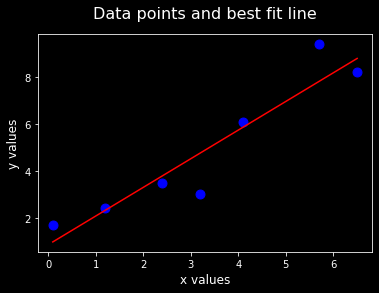

In [4]:
plt.style.use('dark_background')
plt.title('Data points and best fit line', fontsize=16, pad=16)
plt.xlabel('x values', fontsize=12)
plt.ylabel('y values', fontsize=12)

plt.scatter(x_1, y_1, c='b', s=80)
plt.plot(x_1, reg.predict(x_1), c='r')
plt.show()

---
##### MSE function: $mse =  \frac{1}{n} \sum_{i=0}^{n} \big(y - \hat{y} \big)^2$

##### *$\hat{y}$ = $\theta_0 + \theta_1 \cdot x$ = estimated values = y_hat*

In [5]:
# y_hat = estimated values = theta 0 + theta 1 * x
y_hat = reg.intercept_ + reg.coef_ * x_1
print('Estimated y values:\n', y_hat)
print('Actual y values:\n', y_1)

Estimated y values:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Actual y values:
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [6]:
# manually implement the mse function
def mse(y, y_hat):
    # return sum((y - y_hat)**2) / y.size
    return np.average((y - y_hat)**2, axis=0)

print('manually calculated mse: ', mse(y_1, y_hat))
print('mse regression: ', mean_squared_error(y_1, reg.predict(x_1)))

manually calculated mse:  [0.94796558]
mse regression:  0.9479655759794577


---
##### *MSE cost function visualization:*

In [7]:
th_num = 200
th_0 = np.linspace(start=-1, stop=3, num=th_num) # theta 0 data
th_1 = np.linspace(start=-1, stop=3, num=th_num) # theta 1 data
plot_th0, plot_th1 = np.meshgrid(th_0, th_1) # 1d to 2d
plot_cost = np.zeros((th_num, th_num)) # generate matrix of 0's (th_num x th_num)

In [8]:
# populate plot_cost using the theta values and mse function
for i in range(th_num):
    for j in range(th_num):
        y_hat = plot_th0[i][j] + plot_th1[i][j] * x_1
        plot_cost[i][j] = mse(y_1, y_hat)

In [9]:
print('Checking shapes: ', plot_th0.shape, plot_th1.shape, plot_cost.shape)

Checking shapes:  (200, 200) (200, 200) (200, 200)


##### *Plotting MSE:*

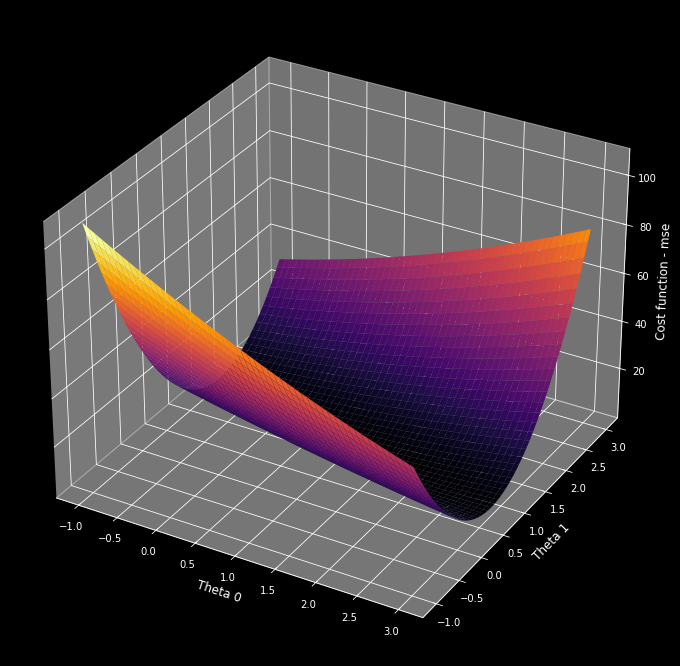

In [10]:
fig = plt.figure(figsize=[12,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=12)
ax.set_ylabel('Theta 1', fontsize=12)
ax.set_zlabel('Cost function - mse', fontsize=12)

ax.plot_surface(plot_th0, plot_th1, plot_cost, cmap=cm.inferno)
plt.show()

In [11]:
# minimun cost
print('Minimum cost: ', plot_cost.min())
# minimun cost index (unravel_index function)
min_i, min_j = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape) # .argmin() Returns the indices of the minimum values along an axis.
min_ij = min_i, min_j
print('Min occurs at: ', min_ij)
print('Min MSE theta 0: ', plot_th0[min_i][min_j])
print('Min MSE theta 1: ', plot_th1[min_i][min_j])

Minimum cost:  0.9483826526747164
Min occurs at:  (111, 91)
Min MSE theta 0:  0.829145728643216
Min MSE theta 1:  1.2311557788944723


---
### *Gradient Descent with the MSE cost function*
---

##### *Partial derivatives of MSE wrt $\theta_0$ and $\theta_1$*
##### *(Equation used for y-hat estimation: linear regression with one variable)*

##### $\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)}\big)$

##### $\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)}\big) \big(x^{(i)}\big)$

In [12]:
def gradient(x, y, thetas):
    n = y.size
    th0_slope = (-2/n) * sum(y - thetas[0] - thetas[1] * x)
    th1_slope = (-2/n) * sum((y - thetas[0] - thetas[1] * x) * x)
    
    return np.append(arr=th0_slope, values=th1_slope)

In [13]:
learning_rate = 0.01
thetas = np.array([2.5, 2.5])  # initial guesses for thetas
n_iter = 1000

# collect data for plotting
plot_values = thetas.reshape(1, 2)
mse_values = mse(y_1, thetas[0] + thetas[1] * x_1) # (y, y_hat)

for i in range(n_iter):
    thetas = thetas - learning_rate * gradient(x_1, y_1, thetas)
    # viz data
    plot_values = np.concatenate((plot_values, thetas.reshape(1, 2)), axis=0)
    mse_values = np.concatenate((mse_values, mse(y_1, thetas[0] + thetas[1] * x_1)), axis=0)
print('Min theta 0: ', thetas[0])
print('Min theta 1: ', thetas[1])
print('mse: ', mse(y_1, thetas[0] + thetas[1] * x_1))
# Converged correctly to the same values

Min theta 0:  0.8521679247168358
Min theta 1:  1.2217222454402306
mse:  [0.9479719]


##### *Gradient descent with MSE: visualization*

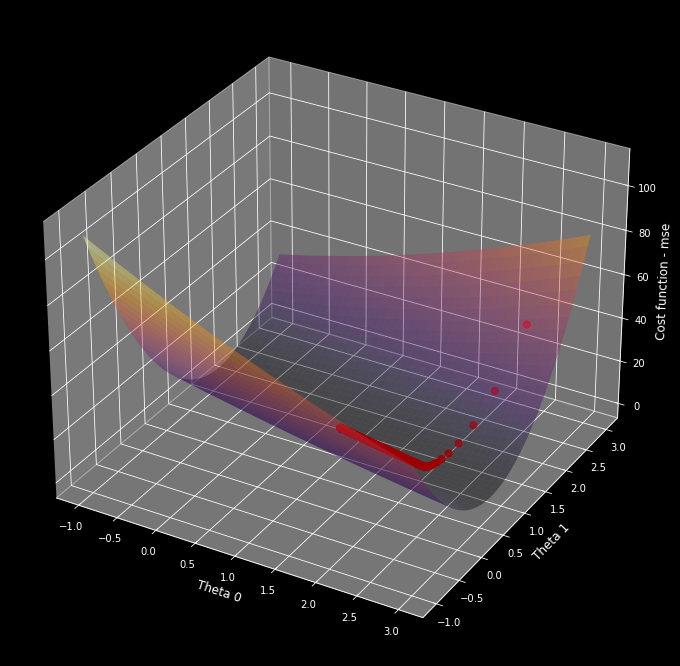

In [14]:
fig = plt.figure(figsize=[12,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=12)
ax.set_ylabel('Theta 1', fontsize=12)
ax.set_zlabel('Cost function - mse', fontsize=12)

ax.scatter(plot_values[:, 0], plot_values[:, 1], mse_values, s=50, c='r') # x = 1st col of plot_values, y = 2nd col of plot_values
ax.plot_surface(plot_th0, plot_th1, plot_cost, cmap=cm.inferno, alpha=0.4)
plt.show()